In [1]:
import pandas as pd
import numpy as np
from funkcje.main_05_wczytanie_csv import wczytaj_main
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Users

In [2]:
users = wczytaj_main(
    input_path="/media/ola/Elements SE/dane_gotowe/",
    typ_pliku="Users",
    kolumny=['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId'],
    part_len=15
)

Zaczynamy!


100%|██████████| 8/8 [00:06<00:00,  1.40it/s]


Gotowe! Zajęło nam to: 302.7s


# Posty

In [3]:
posts = wczytaj_main(
    input_path="/media/ola/Elements SE/dane_gotowe/",
    typ_pliku="Posts",
    kolumny = ['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate', 'OwnerUserId', 'LastEditorUserId', 'Title'],
    part_len=15
)

Zaczynamy!


100%|██████████| 8/8 [00:03<00:00,  2.77it/s]


Gotowe! Zajęło nam to: 508.0s


In [6]:
posts1 = posts.dropna(subset = ['AcceptedAnswerId'])

In [7]:
posts1.OwnerUserId = posts1.OwnerUserId.astype(float)
posts.OwnerUserId = posts.OwnerUserId.astype(float)
posts1.AcceptedAnswerId = posts1.AcceptedAnswerId.astype(float)
posts.Id = posts.Id.astype(float)
users.Id = users.Id.astype(float)
#type(posts1.OwnerUserId.iloc[1])

/home/ola/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
gdzie_ile_zamknal = posts1.query("OwnerUserId != -1.0")#.groupby(["OwnerUserId","Forum"]).size().rename("Count").reset_index()

In [9]:
Pytania_zamkniete = pd.merge(gdzie_ile_zamknal, posts.loc[:,["Id", "Forum","OwnerUserId"]], left_on = ["AcceptedAnswerId","Forum"], right_on = ["Id","Forum"] )

In [10]:
gdzie_ile_zamknal = Pytania_zamkniete.query("OwnerUserId_x != -1.0 and OwnerUserId_y != -1.0")

In [11]:
gdzie_zamknal_konta = pd.merge(gdzie_ile_zamknal, users.loc[:,["Id","Forum","AccountId"]], left_on= ["OwnerUserId_y","Forum"], right_on = ["Id", "Forum"])

In [12]:
ekspert = gdzie_zamknal_konta.groupby("AccountId").size().rename("Count").reset_index().sort_values("Count",ascending = False).head(1)

In [13]:
konta_eksperta = users.query("AccountId == 513966").reset_index()
posty_eksperta = pd.merge(konta_eksperta.loc[:,["Id","DisplayName","AccountId","Forum"]], posts.loc[:,["Id","PostTypeId","OwnerUserId","Forum"]], left_on = ["Id","Forum"], right_on = ["OwnerUserId", "Forum"])
#info_ekspert = pd.merge(ekspert, users, on = "AccountId")

In [14]:
stat_ekspert = posty_eksperta.groupby(["Forum","PostTypeId"]).size().rename("odp i pyt").reset_index().sort_values("odp i pyt", ascending = False)

In [16]:
wykres =  stat_ekspert.query("Forum in ['tex','math','italian','codereview','english'] and PostTypeId in [1,2]") # to jest też typek, który najwiecej napisał postów! same odpowiedzi, żadnych pytań ! łoł łoł !


In [18]:
wykres.to_csv("Ekspert")

In [2]:
wykres = pd.read_csv("dane/Ekspert")

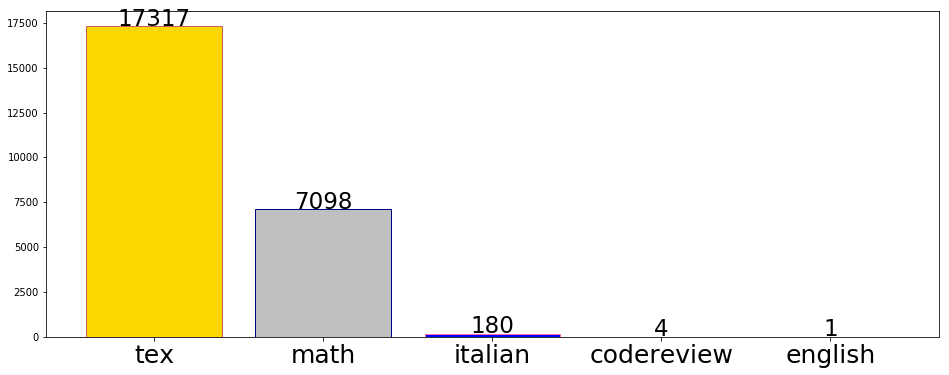

In [6]:

plt.figure(figsize=[16,6], dpi=72)
n = len(wykres.Forum)
plt.bar(wykres.Forum, wykres.loc[:,"odp i pyt"], color = ['gold','silver','blue', 'pink', 'brown'],
       edgecolor=['indianred','navy', 'hotpink', 'orange','darkred']
       )

for i in range(len(wykres.Forum)):
    plt.text(x=i, y=wykres.loc[:,"odp i pyt"].iloc[i]+40, s=wykres.loc[:,"odp i pyt"].iloc[i], size = 23,horizontalalignment='center') 
plt.xticks(size = 25)
plt.savefig('ekspert.png', dpi = 400)
plt.show()

In [4]:
Mareczek = users.query("DisplayName=='gagolews'")


In [19]:
Fora = users.groupby('AccountId').size().rename('ilosc_forów').reset_index().sort_values("ilosc_forów", ascending = False).head(30).reset_index()


In [4]:
kto_jakie_posty = pd.merge( left=users,right=posts, left_on=["Forum", "Id"], right_on = ["Forum", "OwnerUserId"])

In [5]:
Liczba_postow_kazdej_osoby = kto_jakie_posty.groupby(['AccountId']).size().rename('tyle_postow').reset_index().iloc[1:]

In [6]:
data1 = users.loc[users.AccountId.isin(Liczba_postow_kazdej_osoby.AccountId)].groupby('AccountId').size().rename('ilosc_forow').reset_index()

In [7]:
data2 = data1.loc[1:]

In [ ]:
users.AccountId = users.AccountId.astype(float)

In [8]:
Zaleznosc = pd.merge(data2, Liczba_postow_kazdej_osoby, on = 'AccountId').sort_values('ilosc_forow')

In [11]:
Zaleznosc.to_csv("Zaleznosc-fora-posty")

In [9]:
%matplotlib inline

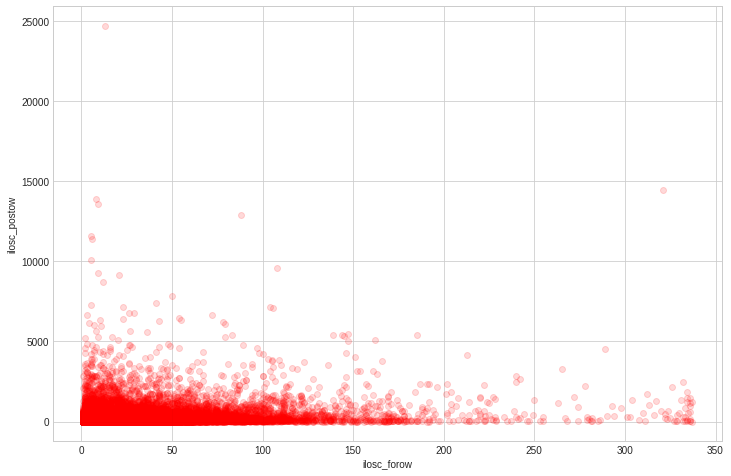

In [10]:
#%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use('seaborn-whitegrid')
plt.plot(Zaleznosc.ilosc_forow, Zaleznosc.tyle_postow, 'ro', alpha = 0.15)
plt.xlabel('ilosc_forow')
plt.ylabel('ilosc_postow')
plt.savefig('actv_vs_size.png')

In [86]:
Zaleznosc2 = pd.merge(data2, Liczba_postow_kazdej_osoby, on = 'AccountId').sort_values('tyle_postow', ascending = False).head(500)

In [14]:
Zaleznosc2 #wszyscy którzy maja wiecej postow niz 10 000

,AccountId,ilosc_forow,tyle_postow
147599,513966.0,13,24683
63502,164368.0,321,14482
146292,512076.0,8,13908
145440,510889.0,9,13608
131728,470318.0,88,12926
668060,3487601.0,5,11571
145719,511285.0,6,11392
394239,1919584.0,5,10082
372404,1801709.0,108,9585
178868,845543.0,9,9246


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np


trace = go.Scattergl(
    x = Zaleznosc2.ilosc_forow,
    y = Zaleznosc2.tyle_postow,
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data, filename='compare_webgl')


In [104]:
top100 = Zaleznosc2.head(100)

In [143]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import plotly.io as pio

trace = go.Scattergl(
    x = top100.AccountId,
    y = top100.tyle_postow,
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]



fig = dict(data=data)
py.iplot(fig,filename='compare_webgl')


#pio.write_image(fig, 'top100.png')




In [87]:
ilosc_postow_w_forum = kto_jakie_posty.loc[kto_jakie_posty.AccountId.isin(Zaleznosc2.AccountId)].groupby(['AccountId','Forum']).size().rename('Count').reset_index()

In [98]:
ludek1AccountId = Zaleznosc2.query("tyle_postow == 24683").AccountId.iloc[0]
ludek1 = ilosc_postow_w_forum.loc[ilosc_postow_w_forum.AccountId==ludek1AccountId,['Forum','Count']].\
query("Forum in ['tex','math','italian','codereview','english']").sort_values("Count", ascending = False)


In [125]:
from pandas_to_markdown import pd_to_markdown

In [126]:
pd_to_markdown(ludek1)

| Forum      | Count |
|------------|-------|
| tex        | 17325 |
| math       | 7098  |
| italian    | 180   |
| codereview | 4     |
| english    | 1     |


In [99]:
ludek1

,Forum,Count
6392,tex,17325
6390,math,7098
6388,italian,180
6386,codereview,4
6387,english,1


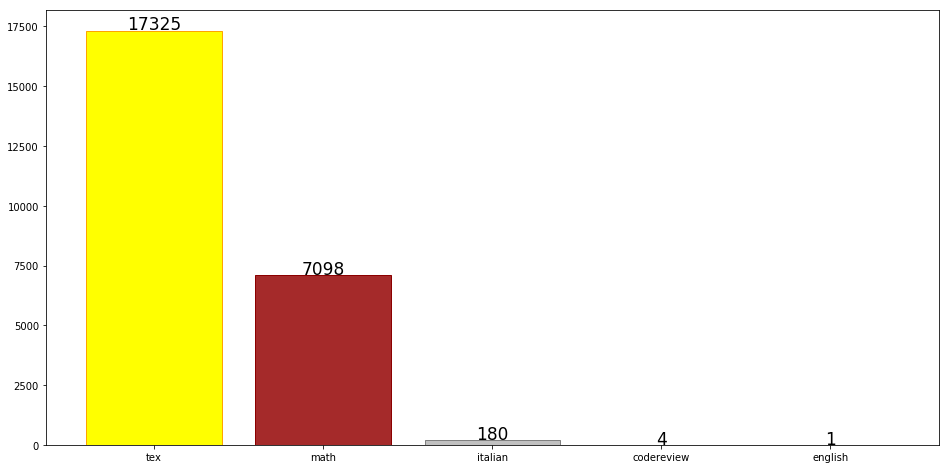

In [101]:
plt.rcParams["figure.figsize"] = (16, 8)
n = len(ludek1.Forum)
plt.bar(ludek1.Forum, ludek1.Count, color = [ 'yellow','brown','silver','gold','green'],
       edgecolor=['orange','darkred','gray','goldenrod','darkgreen']
       )

for i in range(len(ludek1.Forum)):
    plt.text(x=i, y=ludek1.Count.iloc[i]+40, s=ludek1.Count.iloc[i], size = 17,horizontalalignment='center') 
plt.show()

## Coś o ukrainie, polityka a dostępność ludzi na forum? - nic nie znalazłam takiego, ale znalazłam coś innego :)

In [12]:
ukrainian_Users = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Users.csv")
ukrainian_Posts = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Posts.csv")

In [13]:
Aktywnosc = ukrainian_Posts.loc[:,["Id","PostTypeId","OwnerUserId"]].assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
                groupby(["Year", "Month","Day"]).size().rename("Count").reset_index()
Pytania_i_odpowiedzi = ukrainian_Posts.loc[:,["Id","PostTypeId","OwnerUserId"]].assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
                groupby(["Year", "Month","Day","PostTypeId"]).size().rename("Count").reset_index()

In [14]:
Pytania_i_odpowiedzi['Data'] = pd.to_datetime(Pytania_i_odpowiedzi[['Year','Month','Day']])
Aktywnosc['Data'] = pd.to_datetime(Aktywnosc[['Year','Month','Day']])


In [15]:
data4 = ukrainian_Posts.assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
loc[:,["Id","PostTypeId","ViewCount","Body","OwnerUserId","Title",'AnswerCount','CommentCount','Year','Month','Day']]
data4['Data'] = pd.to_datetime(data4[['Year','Month','Day']])
data5 = data4.loc[:,["Id","PostTypeId","ViewCount","Body","OwnerUserId","Title",'AnswerCount','CommentCount','Data']]

In [16]:
data5.groupby('OwnerUserId').size().rename('Count').reset_index().sort_values('Count', ascending = False).head(4)

,OwnerUserId,Count
1,4.0,337
277,1505.0,280
258,1467.0,244
3,8.0,244


In [17]:
data6=data5.query("OwnerUserId== 8.0").groupby("Data").size().rename("Count").reset_index()

In [18]:
data7 = data5.query("OwnerUserId == 4.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

In [19]:
data8 = data5.query("OwnerUserId == 1505.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

In [20]:
data9 = data5.query("OwnerUserId == 1467.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

## Zależność zależnosći 4 osób najbardziej aktywnych

In [21]:
Aktywnosc.to_csv("Aktywnosc_zbiorcza")
data6.to_csv("Aktyw1")
data7.to_csv("Aktyw2")
data8.to_csv("Aktyw3")
data9.to_csv("Aktyw4")

In [155]:
data1 = [
    go.Scatter(
    x = data7.Data, 
    y = data7.Count, 
    name = 'OwnerUserId = 4'),
    go.Scatter(
    x = data6.Data,
    y = data6.Count,
    name = 'OwnerUserId = 8'
    ),
    go.Scatter(
    x = data8.Data, 
    y = data8.Count, 
    name = 'OwnerUserId = 1505'),
    go.Scatter(
    x = data9.Data,
    y = data9.Count,
    name = 'OwnerUserId = 1467'
    )
]
py.iplot(data1, filename='pandas-line-naming-traces')

# Zbiorcza aktywność ludzi na ukraińskim forum

In [166]:
from plotly import tools
trace1 = go.Scatter(x=list(Aktywnosc.Data),
                   y=list(Aktywnosc.Count), name = 'Aktywność wspólna')
#data1 = [
trace2 =     go.Scatter(
    x = data7.Data, 
    y = data7.Count, 
    name = 'OwnerUserId = 4')
trace3 = go.Scatter(
    x = data6.Data,
    y = data6.Count,
    name = 'OwnerUserId = 8'
    )
trace4=     go.Scatter(
    x = data8.Data, 
    y = data8.Count, 
    name = 'OwnerUserId = 1505')
trace5 =    go.Scatter(
    x = data9.Data,
    y = data9.Count,
    name = 'OwnerUserId = 1467'
    )


#data = [trace1,trace2,trace3,trace4,trace5]

fig = tools.make_subplots(rows=2, cols=1, specs=[[{}], [{}]],
                          shared_xaxes=True, shared_yaxes=True,
                          vertical_spacing=0.001)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)

#fig = dict(data=data, layout=layout)
pio.write_image(fig, 'funkcje/ukraina.png')
py.iplot(fig, filename='stacked-subplots-shared-xaxes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



## Wniosek? 4 osóby robią prawie całą aktywność

# Kurs bit coina a aktywnośc na kryptowalutach

## Załadowanie danych o kursie bitcoina

In [167]:
bit_kurs =pd.read_csv("/media/ola/Elements SE/dane_dodatkowe/market-price.csv")
#ukrainian_Badges = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Badges.csv")

In [168]:
bit_kurs = bit_kurs.rename(columns={"2009-01-03 00:00:00":"Data","0.0":"Kurs"})
dane_bitcoin = bit_kurs.assign(Year=pd.to_datetime(bit_kurs['Data']).dt.year).query("Year >= 2011")

# Załadowanie danych o bitcoinie ze stackexchange

In [22]:
bitcoin_Posts = pd.read_csv("/media/ola/Elements SE/dane_gotowe/bitcoin_Posts.csv")

In [23]:
stackbitcoin = bitcoin_Posts.assign(Year=pd.to_datetime(bitcoin_Posts['CreationDate']).dt.year, Month=pd.to_datetime(bitcoin_Posts['CreationDate']).\
                     dt.month,Day=pd.to_datetime(bitcoin_Posts['CreationDate']).dt.day).query("OwnerUserId != -1").groupby(['Year','Month','Day']).size().rename('Count').reset_index()

In [24]:
stackbitcoin['Data'] = pd.to_datetime(stackbitcoin[['Year','Month','Day']])

In [25]:
stackbitcoin.to_csv("bitcoin_stack")

In [179]:

trace1 =go.Scatter(
        x = stackbitcoin.Data, 
        y = stackbitcoin.Count, 
        name = 'Aktywnosc', 
        line = dict(color='rgb(148, 103, 189)',
                   width = 1)
)

trace2 = go.Scatter(
        x = dane_bitcoin.Data,
        y = dane_bitcoin.Kurs,
        name = 'Kurs',
        yaxis='y2',
        line = dict(width = 3)
        )

data2 = [trace1,trace2]
layout = go.Layout(
    title='Course Bitcoin vs Activity',
    yaxis=dict(
        title='Activity',
        titlefont = dict(color='orangered')
    ),
    yaxis2=dict(
        title='Course',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data2, layout=layout)
pio.write_image(fig, 'funkcje/bitcoin.png')
py.iplot(fig, filename='kurs-vs-activity')

# Aktywność na Gardening a sezony - jakaś zależność?

In [26]:
gar_pos = pd.read_csv("/media/ola/Elements SE/dane_gotowe/gardening_Posts.csv")

In [27]:
active = gar_pos.assign(Year=pd.to_datetime(gar_pos['CreationDate']).dt.year, Month=pd.to_datetime(gar_pos['CreationDate']).\
                     dt.month,Day=pd.to_datetime(gar_pos['CreationDate']).dt.day).query("OwnerUserId != -1").groupby(['Year','Month','Day']).size().rename('Count').reset_index()

In [28]:
active['Data'] = pd.to_datetime(active[['Year','Month','Day']])

In [29]:
active.to_csv("Aktywnosc_gardening")

In [178]:
trace1 =go.Scatter(
        x = active.Data, 
        y = active.Count, 
        name = 'Aktywnosc', 
        line = dict(color='rgb(148, 103, 189)',
                   width = 1)
)
layout = {
    # to highlight the timestamp we use shapes and create a rectangular
    'shapes': [
        # 1st highlight during Feb 4 - Feb 6
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2011-05-01','y0': 0,'x1': '2011-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2012-05-01','y0': 0,'x1': '2012-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2013-05-01','y0': 0,'x1': '2013-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2014-05-01','y0': 0,'x1': '2014-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2015-05-01','y0': 0,'x1': '2015-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2016-05-01','y0': 0,'x1': '2016-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2017-05-01','y0': 0,'x1': '2017-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},   
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2018-05-01','y0': 0,'x1': '2018-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}}
    ]
}
data3 = [trace1]
pio.write_image({'data':data3, 'layout':layout}, 'funkcje/garden.png')
py.iplot({'data':data3, 'layout':layout}, filename='Gardening-Activity')


Zaznaczyłam sezony rolnicze  no i fajnie widać zależność, że przed sezonem ludzie piszą i początek sezonu - poem mają dużo pracy, więc nie mają czasu, a w zime jest mała dość aktywność, to się zgadza z rzeczywistością :)

# Plotly

In [26]:
import plotly 
plotly.tools.set_credentials_file(username='aleksandramiesiac', api_key='klaMDSOdIcIVScwKfzXU')